<h4> Importing Libraries </h4>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

<h4> Loading the dataset. For this activity, we will use Fashion_MNIST dataset available in Keras

In [3]:
dfInputData = keras.datasets.fashion_mnist

In [4]:
# Dividing the data into train and test sets without using train test split
# Load data function returns two tuples of train and test set
(X_train, y_train), (X_test, y_test) = dfInputData.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Checking the data dimensions
print(f"The Train set contains {X_train.shape[0]} images.")
print(f"The test set contains {X_test.shape[0]} images.")

The Train set contains 60000 images.
The test set contains 10000 images.


In [6]:
# Each training sample contains an image of dimensions 28x28
# Each pixel intensity is represented as a byte (0 to 255)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [7]:
# Total 60,000 samples of size 28*28
X_train.shape

(60000, 28, 28)

In [8]:
# The images are numpy arrays.
type(X_train)

numpy.ndarray

In [9]:
# unsigned int (0 to 255)
X_train.dtype

dtype('uint8')

In [10]:
# Splitting the training set further into a Train set and Validation set.
# We will also scale the values using a min-max scaler (Avoid exploding and vanishing gradients)
# Keeping aside 5000 examples as validation set
X_val, X_train = X_train[0:5000]/255, X_train[5000:]/255 # Scaling as the data represents pixel intensities
y_val, y_train = y_train[0:5000], y_train[5000:] # No need to scale as it is a multi-class classification label
X_test = X_test/255

In [11]:
# Checking the data dimensions
print(f"The Train set contains {X_train.shape[0]} images.")
print(f"The validation set contains {X_val.shape[0]} images.")
print(f"The test set contains {X_test.shape[0]} images.")

The Train set contains 55000 images.
The validation set contains 5000 images.
The test set contains 10000 images.


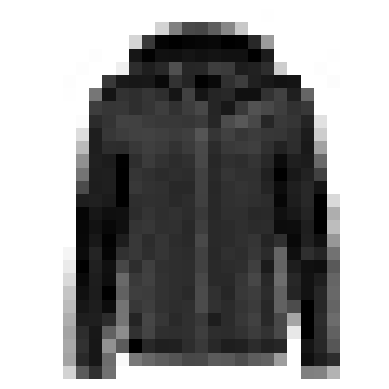

In [12]:
# Plotting some images using matplotlib.imshow() with a binary color map
# cmap = binary (Specifies the color map)
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [13]:
# Cl
y_train[0]

4

The following image has details of the dataset and meaning of each class label

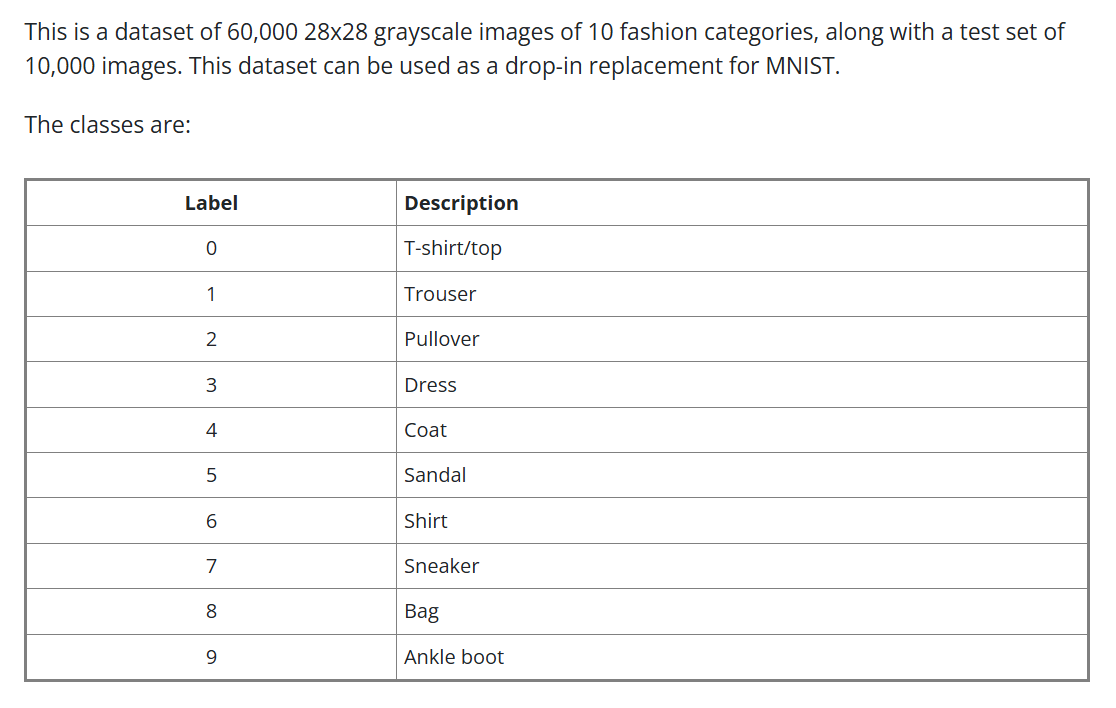

In [14]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

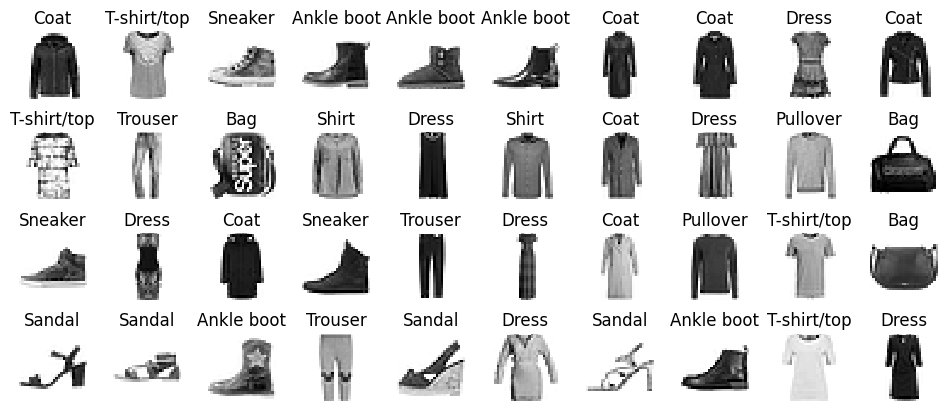

In [15]:
# Looking at some examples
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols*row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest") #interpolation = "nearest" will help the image edges look sharper.
    plt.axis("off")
    plt.title(class_labels[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<h3> MODEL CREATION </h3>

<h5> We will create a model using the Sequential() API in this case. Since we do not need residual connections as we are not training a very deep network, we will not be using the Functional() API

In [16]:
model = keras.models.Sequential()

In [17]:
# We have 3-dimensional arrays as inputs. To pass them to the input layer of the network, we need to flatten the images
# When a 28x28 image is flattened, it becomes a one dimensional tensor of length 28x28 = 784
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dense(units=100, activation="relu"))
model.add(keras.layers.Dense(units=10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# To make the results reproducible
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

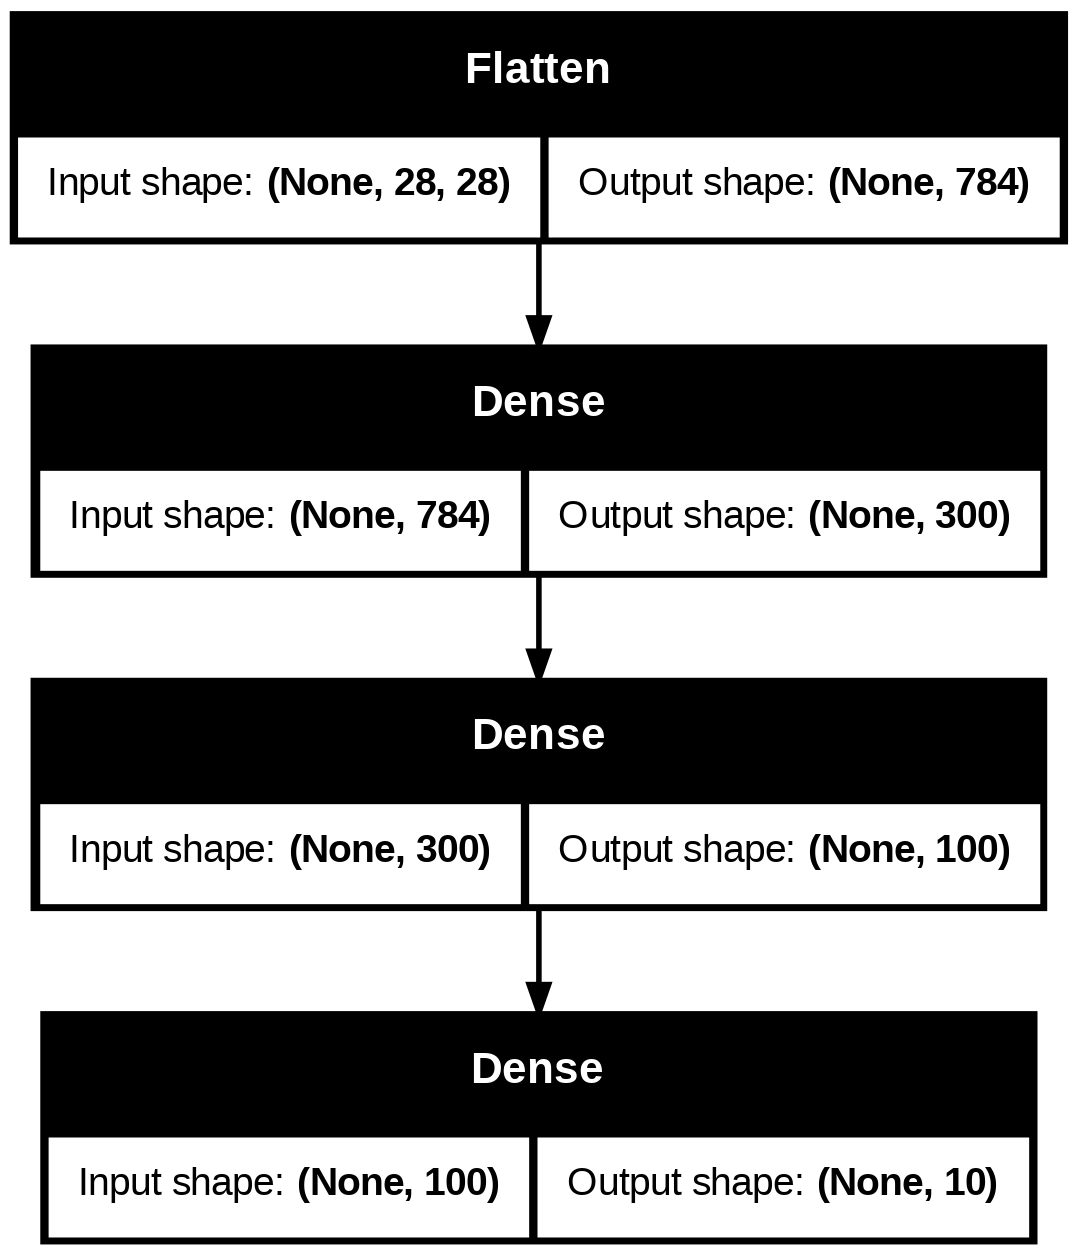

In [21]:
# Visualizing the Neural Network
keras.utils.plot_model(model, "model_architecture_NN_MNIST_FASHION_classifcation.png", show_shapes=True)

In [22]:
# Checking the randomly initialized weights of the first hidden layer
hidden_layer_1 = model.layers[1] #layers[0] will be the flatten layer
weights_l1, bias_l1 = hidden_layer_1.get_weights()

In [23]:
weights_l1

array([[ 0.05629262,  0.01271582,  0.03223115, ..., -0.06153792,
        -0.03241295,  0.01180387],
       [-0.06543454, -0.06075532,  0.01607681, ..., -0.06751905,
        -0.07431622, -0.03098074],
       [-0.06308413, -0.00842786, -0.00273119, ...,  0.06494507,
         0.03078806,  0.00926088],
       ...,
       [-0.0419706 ,  0.07343046, -0.00499562, ..., -0.06448741,
         0.05591911, -0.03236625],
       [-0.02564216, -0.04604429,  0.06307524, ..., -0.04279032,
        -0.02570055,  0.05977215],
       [ 0.03956769,  0.01838465, -0.04884771, ..., -0.00689346,
        -0.06640077, -0.01109705]], dtype=float32)

In [24]:
bias_l1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
# 784 inputs are there and 300 neurons are there
# There are 784 rows and 300 columns
# The weights assigned to each layer are thus stored column-wise
weights_l1.shape

(784, 300)

In [26]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# The above statement is equivalent to this one
# model.compile(loss = keras.losses.CategoricalCrossentropy, optimizer=keras.optimizers.Adam, metrics=keras.metrics.Accuracy)

In [28]:
# Running the model and performing gradient descent
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7816 - loss: 0.6089 - val_accuracy: 0.8674 - val_loss: 0.3671
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8613 - loss: 0.3752 - val_accuracy: 0.8750 - val_loss: 0.3432
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8763 - loss: 0.3341 - val_accuracy: 0.8790 - val_loss: 0.3304
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8865 - loss: 0.3035 - val_accuracy: 0.8892 - val_loss: 0.3052
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8958 - loss: 0.2821 - val_accuracy: 0.8872 - val_loss: 0.3183
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9006 - loss: 0.2675 - val_accuracy: 0.8878 - val_loss: 0.3282
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9055 - loss: 0.2552 - val_accuracy: 0.8972 - val_loss: 0.3099
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9087 - loss: 

In [29]:
# To identify overfitting, look at the training and validation loss
# If the validation loss keeps decreasing, keep going.
# If we reach a point where the training loss is decreasing, but validation loss has started increasing, we are at the overfitting point.
# Best to stop at this point

In [30]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

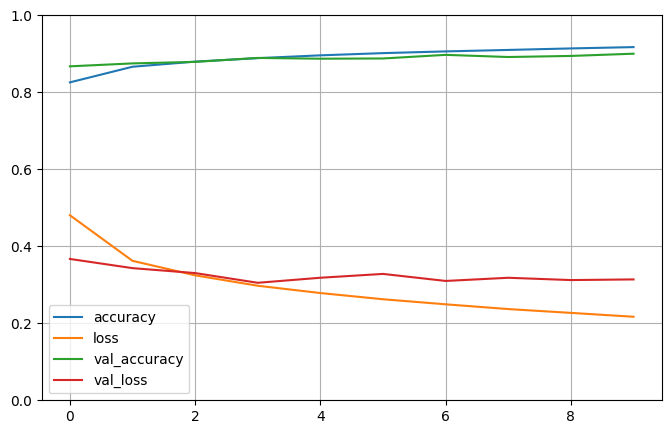

In [31]:
# Plotting Epoch-wise loss
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.3805


[0.3707912862300873, 0.8847000002861023]

In [33]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
# The output array has probabilities of the sample belonging to 10 different classes.
# To get the class prediction, we can get the argmax and map it with the output labels
y_pred.shape

(10000, 10)

In [35]:
# -1 implies the last dimension (which is the column in this case)
y_pred = np.argmax(y_pred, axis=-1)

In [36]:
y_pred.shape[0]

10000

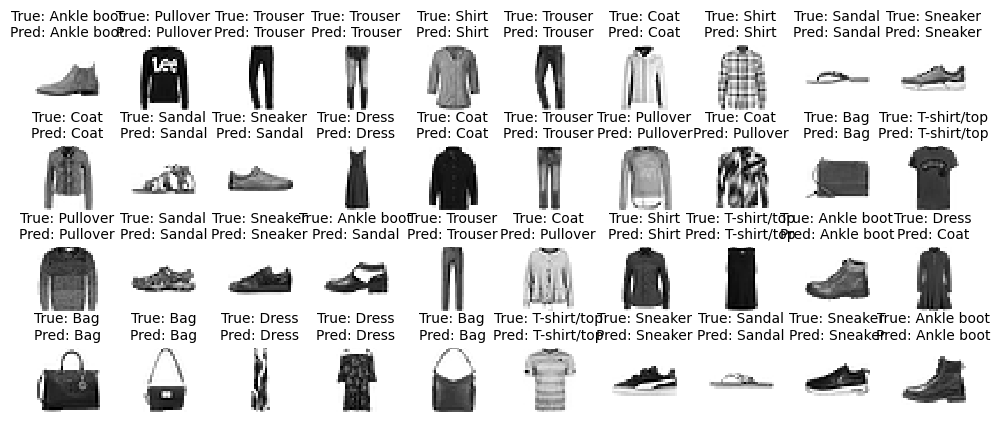

In [37]:
# Looking at some examples
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols*row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_test[index], cmap="binary", interpolation="nearest") #interpolation = "nearest" will help the image edges look sharper.
    plt.axis("off")
    plt.title(f"True: {class_labels[y_test[index]]}\nPred: {class_labels[y_pred[index]]}", fontsize=10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [43]:
# Trying different layers and parameters
# Batch Normalization - Normalizes output of previous layer using batch mean and SD. Already has an offset param Beta
# Beta works like bias term. Hence use_bias = False
# he_normal - better suited for ReLu and Leaky Relu over Glorot (which is default)
# dropout - drops out certain nodes with the probabilty 0.3
# Leaky ReLU because ReLU also has dropout when the value of aggregation term is negative
# adamW changes the way in which the weight decay during regularization
# Early Stopping - to prevent overfitting. When the validation loss doesn't increase, it waits for patience number of rounds(5 here) and stops training

# Disabling L2 Regularization Increased both train and val accuracy
model_modified = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),

    # Hidden Layer 1
    # keras.layers.Dense(350, kernel_initializer="he_normal", use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dense(350, kernel_initializer="he_normal"),
    # keras.layers.Dense(400),
    # keras.layers.BatchNormalization(),
    # keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.1),

    # Hidden Layer 2
    # keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-4)),
    # keras.layers.Dense(200, kernel_initializer="he_normal"),
    # keras.layers.Dense(200),
    # # keras.layers.BatchNormalization(),
    # # keras.layers.LeakyReLU(alpha=0.1),
    # keras.layers.ReLU(),
    # keras.layers.Dropout(0.1),

    # Hidden Layer 3
    # keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    # keras.layers.Dense(100),
    # keras.layers.BatchNormalization(),
    # keras.layers.LeakyReLU(alpha=0.1),
    # keras.layers.Activation("swish"),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.1),

    # Output Layer
    keras.layers.Dense(10, activation="softmax")
])

lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

# Compile with AdamW and label smoothing
model_modified.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=lr_scheduler, weight_decay=1e-4),
    # optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model_modified.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 350)                 │         274,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 350)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 350)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          35,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,860 (1.19 MB)

 Trainable params: 310,860 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

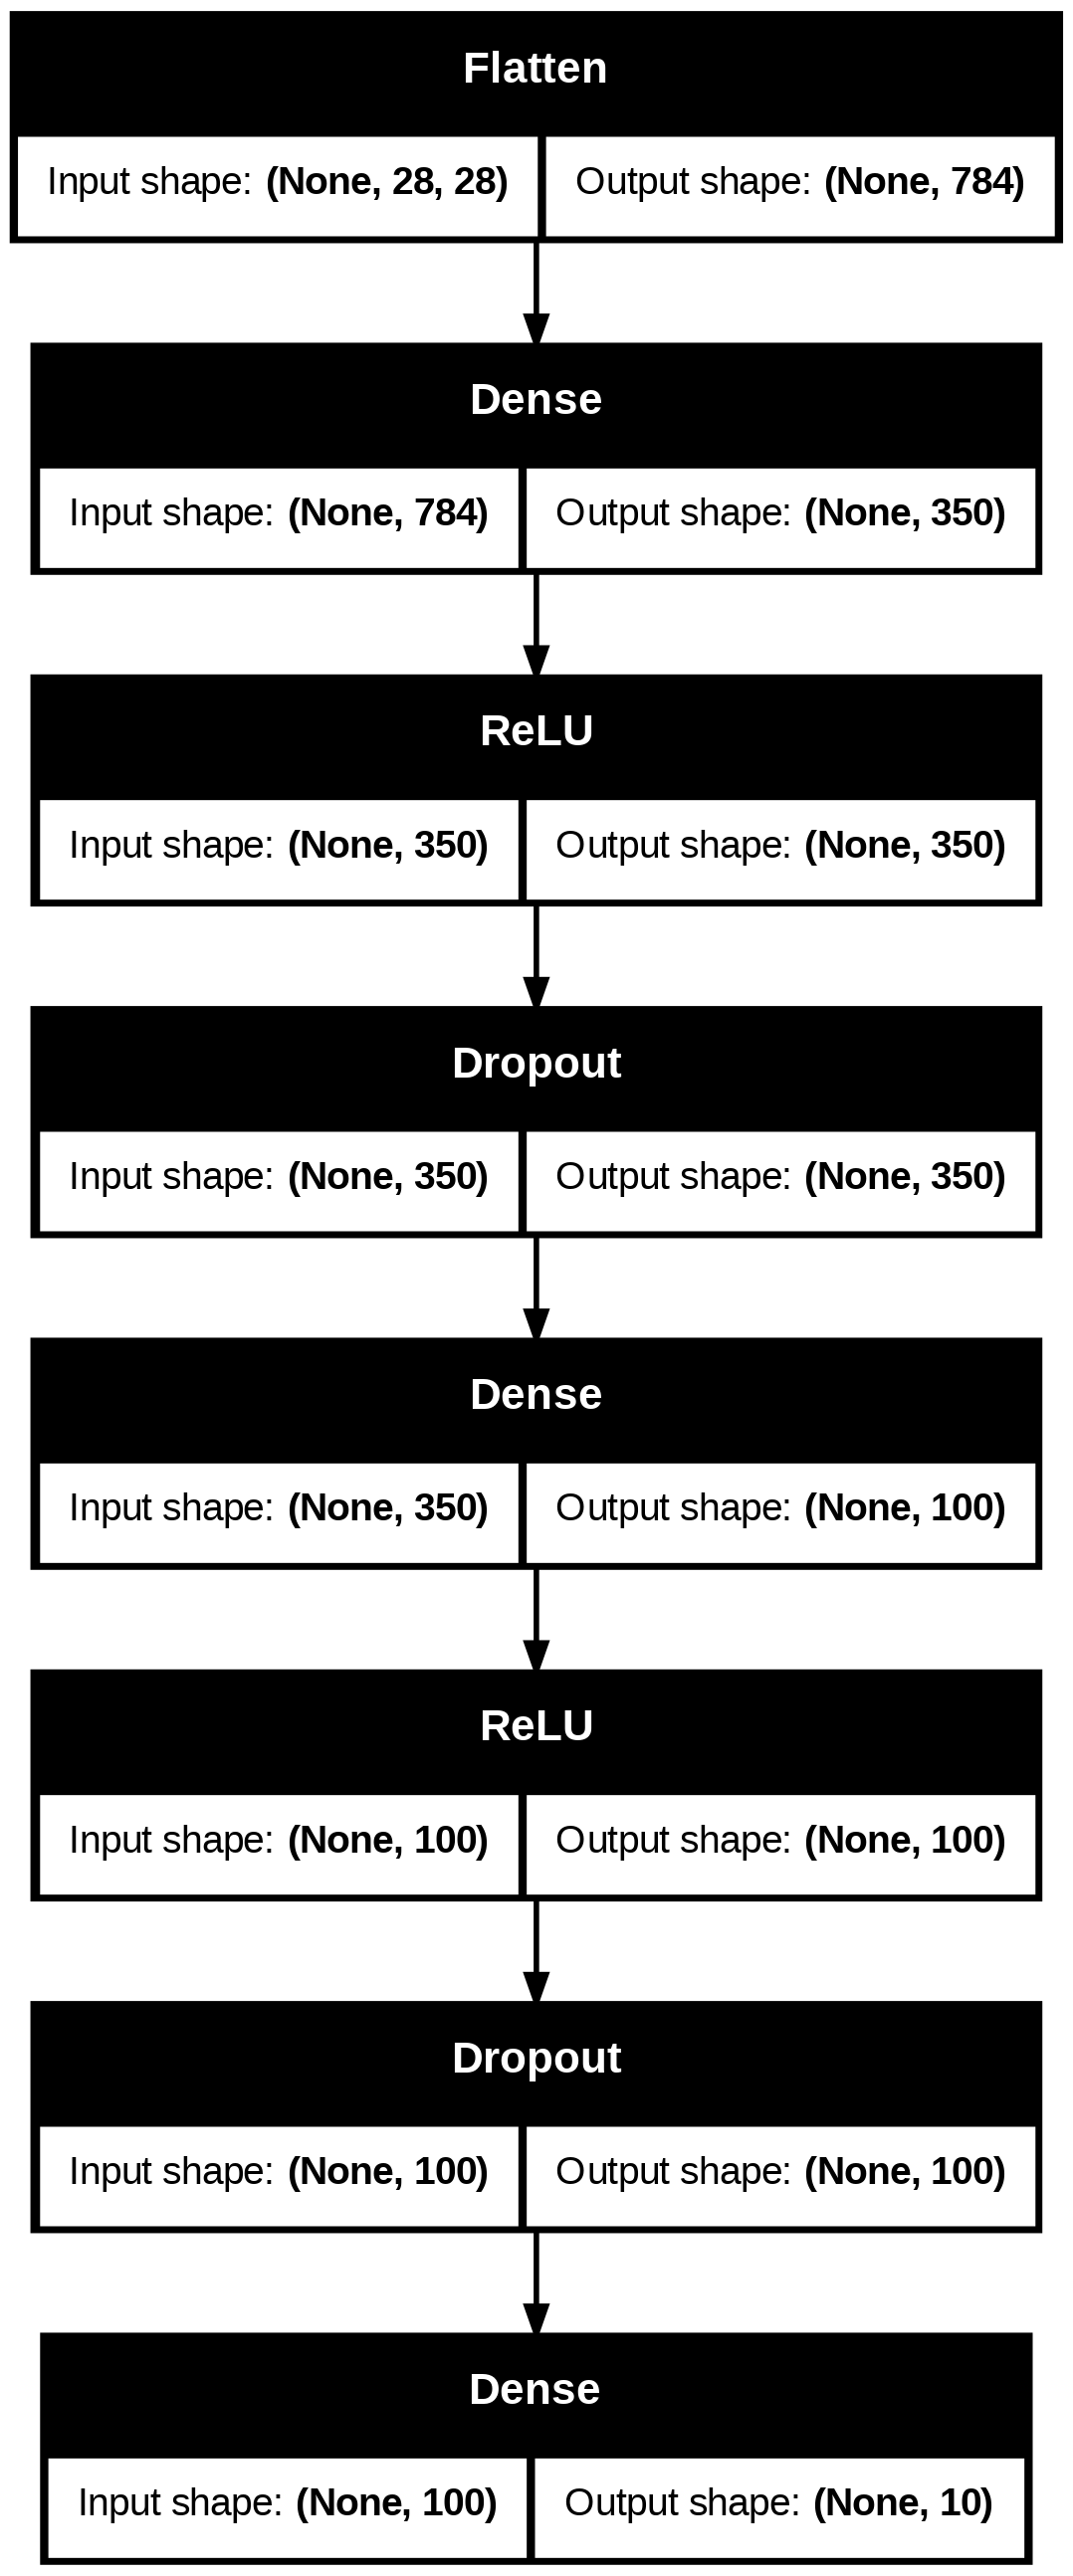

In [45]:
# Visualizing the Neural Network
keras.utils.plot_model(model_modified, "new_model_architecture_NN_MNIST_FASHION_classifcation.png", show_shapes=True)

In [46]:
# Running the model and performing gradient descent
# history_modified = model_modified.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val), callbacks=[early_stopping])
history_modified = model_modified.fit(X_train, y_train, epochs = 30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7631 - loss: 0.6544 - val_accuracy: 0.8584 - val_loss: 0.3802
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8520 - loss: 0.3990 - val_accuracy: 0.8740 - val_loss: 0.3423
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8693 - loss: 0.3530 - val_accuracy: 0.8794 - val_loss: 0.3323
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8783 - loss: 0.3274 - val_accuracy: 0.8828 - val_loss: 0.3204
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8864 - loss: 0.3069 - val_accuracy: 0.8882 - val_loss: 0.3100
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8902 - loss: 0.2925 - val_accuracy: 0.8910 - val_loss: 0.2972
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8943 - loss: 0.2811 - val_accuracy: 0.8852 - val_loss: 0.3099
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8983 - loss: 0

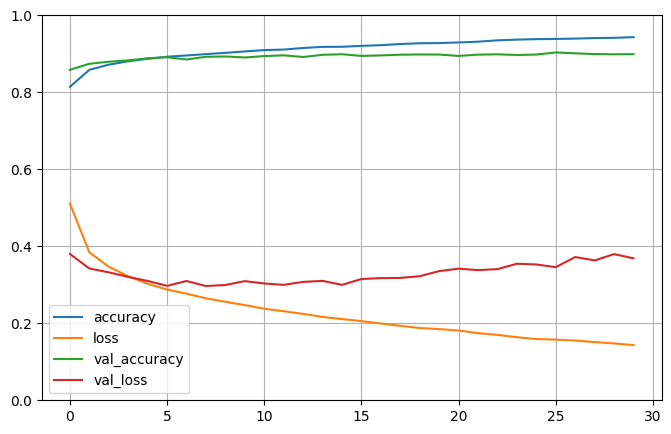

In [47]:
# Plotting Epoch-wise loss
import pandas as pd
pd.DataFrame(history_modified.history).plot(figsize = (8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

<h4> Bayesian Optimization for Hyperparameter tuning </h4>

In [48]:
!pip install keras-tuner tensorflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [49]:
%%time
import keras_tuner as kt
from tensorflow import keras

# Define the hypermodel function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))

    # Tune the number of units in the first Dense layer
    hp_units1 = hp.Int('units1', min_value=100, max_value=500, step=50)
    model.add(keras.layers.Dense(units=hp_units1, kernel_initializer="he_normal"))
    model.add(keras.layers.ReLU())

    # Tune the dropout rate for the first Dropout layer
    hp_dropout1 = hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)
    model.add(keras.layers.Dropout(rate=hp_dropout1))

    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=50, max_value=300, step=50)
    model.add(keras.layers.Dense(units=hp_units2, kernel_initializer="he_normal"))
    model.add(keras.layers.ReLU())

    # Tune the dropout rate for the second Dropout layer
    hp_dropout2 = hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)
    model.add(keras.layers.Dropout(rate=hp_dropout2))

    # Output layer
    model.add(keras.layers.Dense(10, activation="softmax"))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = keras.optimizers.AdamW(learning_rate=hp_learning_rate, weight_decay=1e-4)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"]
    )

    return model

# Initialize the Bayesian Optimization tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    num_initial_points=5,
    seed=42,
    directory='my_dir',
    project_name='bayesian_opt'
)

# Perform the hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print(f"Best number of units in first Dense layer: {best_hyperparameters.get('units1')}")
print(f"Best dropout rate for first Dropout layer: {best_hyperparameters.get('dropout1')}")
print(f"Best number of units in second Dense layer: {best_hyperparameters.get('units2')}")
print(f"Best dropout rate for second Dropout layer: {best_hyperparameters.get('dropout2')}")
print(f"Best learning rate: {best_hyperparameters.get('learning_rate')}")


Trial 20 Complete [00h 05m 58s]
val_accuracy: 0.8981999754905701

Best val_accuracy So Far: 0.9083999991416931
Total elapsed time: 02h 13m 27s
Best number of units in first Dense layer: 500
Best dropout rate for first Dropout layer: 0.4
Best number of units in second Dense layer: 300
Best dropout rate for second Dropout layer: 0.4
Best learning rate: 0.0001
CPU times: user 2h 32min 18s, sys: 8min 42s, total: 2h 41min
Wall time: 2h 13min 29s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
